In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [4]:
titanic.shape

(891, 15)

In [5]:
titanicdf = titanic.dropna()

In [6]:
titanicdf.shape

(182, 15)

In [7]:
titanicdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [8]:
titanicdf.pivot_table('survived', 'sex', 'class')

class,First,Second,Third
sex,,,
female,0.959459,0.888889,0.6
male,0.421687,0.666667,0.4


<AxesSubplot: xlabel='class'>

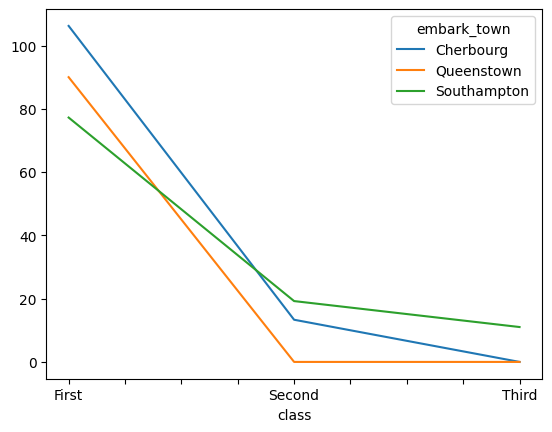

In [9]:
titanicdf.pivot_table('fare', 'class', 'embark_town', fill_value= 0).plot()

In [10]:
titanicdf.pivot_table('survived', 'class', 'deck', fill_value = 0, margins= True)

deck,A,B,C,D,E,F,G,All
class,,,,,,,,
First,0.583333,0.744186,0.588235,0.740741,0.708333,0.000000,0.0,0.675159
Second,0.000000,0.000000,0.000000,0.750000,0.666667,0.875000,0.0,0.800000
Third,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.5,0.500000
All,0.583333,0.744186,0.588235,0.741935,0.733333,0.636364,0.5,0.675824


In [11]:
age = pd.cut(titanic['age'], [0,18,80])
titanicdf.pivot_table('survived', ['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

In [12]:
titanicdf.groupby(['class', age, 'sex']).describe()

survived                                            \
                          count      mean       std  min   25%  50%   75%   
class  age      sex                                                         
First  (0, 18]  female     11.0  0.909091  0.301511  0.0  1.00  1.0  1.00   
                male        5.0  0.800000  0.447214  0.0  1.00  1.0  1.00   
       (18, 80] female     63.0  0.968254  0.176731  0.0  1.00  1.0  1.00   
                male       78.0  0.397436  0.492535  0.0  0.00  0.0  1.00   
Second (0, 18]  female      1.0  1.000000       NaN  1.0  1.00  1.0  1.00   
                male        3.0  1.000000  0.000000  1.0  1.00  1.0  1.00   
       (18, 80] female      8.0  0.875000  0.353553  0.0  1.00  1.0  1.00   
                male        3.0  0.333333  0.577350  0.0  0.00  0.0  0.50   
Third  (0, 18]  female      2.0  0.500000  0.707107  0.0  0.25  0.5  0.75   
                male        1.0  1.000000       NaN  1.0  1.00  1.0  1.00   
       (18, 80] female      3.0  0.666667  0.577350  0.0  0.50  1.0  1.00   
                male        4.0  0.250000  0.500000  0.0  0.00  0.0  0.25   

                            pclass       ... parch       fare              \
                        max  count mean  ...   75%  max count        mean   
class  age      sex                      ...                                
First  (0, 18]  female  1.0   11.0  1.0  ...   2.0  2.0  11.0  127.474245   
                male    1.0    5.0  1.0  ...   2.0  2.0   5.0  114.638320   
       (18, 80] female  1.0   63.0  1.0  ...   1.0  2.0  63.0   98.877314   
                male    1.0   78.0  1.0  ...   0.0  4.0  78.0   73.997064   
Second (0, 18]  female  1.0    1.0  2.0  ...   1.0  1.0   1.0   39.000000   
                male    1.0    3.0  2.0  ...   1.0  1.0   3.0   30.333333   
       (18, 80] female  1.0    8.0  2.0  ...   0.0  0.0   8.0   11.848962   
                male    1.0    3.0  2.0  ...   1.0  2.0   3.0   17.291667   
Third  (0, 18]  female  1.0    2.0  3.0  ...   1.0  1.0   2.0   13.581250   
                male    1.0    1.0  3.0  ...   1.0  1.0   1.0   12.475000   
       (18, 80] female  1.0    3.0  3.0  ...   1.5  2.0   3.0   13.212500   
                male    1.0    4.0  3.0  ...   0.0  0.0   4.0    7.750000   

                                                                               \
                              std      min         25%        50%         75%   
class  age      sex                                                             
First  (0, 18]  female  75.987645  39.4000   68.814600  108.90000  181.443750   
                male    25.063808  81.8583  108.900000  110.88330  120.000000   
       (18, 80] female  61.720087  25.9292   56.414600   79.65000  127.250000   
                male    88.329868   0.0000   30.000000   52.27710   79.112500   
Second (0, 18]  female        NaN  39.0000   39.000000   39.00000   39.000000   
                male     7.505553  26.0000   26.000000   26.00000   32.500000   
       (18, 80] female   1.465201  10.5000   10.500000   11.75000   13.000000   
                male     7.541897  12.8750   12.937500   13.00000   19.500000   
Third  (0, 18]  female   4.410579  10.4625   12.021875   13.58125   15.140625   
                male          NaN  12.4750   12.475000   12.47500   12.475000   
       (18, 80] female   3.183478  10.4625   11.468750   12.47500   14.587500   
                male     0.200000   7.6500    7.650000    7.65000    7.750000   

                                  
                             max  
class  age      sex               
First  (0, 18]  female  262.3750  
                male    151.5500  
       (18, 80] female  263.0000  
                male    512.3292  
Second (0, 18]  female   39.0000  
                male     39.0000  
       (18, 80] female   13.7917  
                male     26.0000  
Third  (0, 18]  female   16.7000  
                male     12.4750  
       (18, 80] female   16.7000  
     

In [14]:
titanicdf.groupby('sex').mean()

C:\Users\commo\AppData\Local\Temp\ipykernel_8160\3629064875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanicdf.groupby('sex').mean()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900,0.000000,0.363636
male,0.436170,1.170213,38.382128,0.404255,0.414894,69.482049,0.925532,0.489362
